In [190]:
import pandas as pd
import numpy as np

In [191]:
from google.colab import files
y= files.upload()

Saving transformer-parameters.csv to transformer-parameters (3).csv


In [192]:
dset2= pd.read_csv("transformer-parameters (1).csv")
dset2.head()

,Area,GSP Group,S/S or Busbar Name Node 1,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2,S/S or Busbar Name Node 2 Voltage,Transformer ID,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating,Method of Earthing
0,SWALES,Cardiff East & Aberthaw 132 kV,CARS1,132,CARS5,11.0,681123.0,YNd,1.90,69.90,65.200,-20.0,10.0,NaN,20.0,Earth Tx
1,SWALES,Cardiff East & Aberthaw 132 kV,CARS1,132,CARS5,11.0,681124.0,YNd,1.90,69.65,65.200,-20.0,10.0,NaN,20.0,Earth Tx
2,SWALES,Cardiff East & Aberthaw 132 kV,GRAT1,132,GRAT5,11.0,681192.0,YNd,1.92,85.10,72.300,-20.0,10.0,NaN,20.0,Earth Tx
3,SWALES,Cardiff East & Aberthaw 132 kV,GRAT1,132,GRAT5,11.0,681193.0,YNd,1.92,85.10,72.300,-20.0,10.0,NaN,20.0,Earth Tx
4,SWALES,Cardiff East & Aberthaw 132 kV,LLEL11,132,LLEL5A,11.0,680867.0,YNyn,2.65,90.96,545.768,-23.0,5.0,NaN,20.0,LER


In [193]:
dset2.tail()

,Area,GSP Group,S/S or Busbar Name Node 1,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2,S/S or Busbar Name Node 2 Voltage,Transformer ID,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating,Method of Earthing
2467,WEST,Willenhall 132kV,WILL GT2,132,WILL112B,11.0,3092205.0,xd1,2.420,85.130,79.000,-20.0,10.0,NaN,30.0,TR
2468,WEST,Willenhall 132kV,WILL GT4,132,WILL114B,11.0,3092110.0,xd1,2.594,69.170,69.170,-20.0,10.0,NaN,30.0,TR
2469,WEST,Willenhall 132kV,WILL GT1,132,WILL111A,11.0,4169152.0,xd1,2.200,90.633,84.067,-20.0,10.0,NaN,30.0,TR
2470,WEST,Willenhall 132kV,WOLV tmp,132,WOLV T3,33.0,3092656.0,xd1,0.992,21.467,21.467,-20.0,10.0,NaN,60.0,TX
2471,WEST,Willenhall 132kV,WOLV33 3,33,WOLV11 5,11.0,3093094.0,yx0,2.881,76.852,0.000,-17.0,6.0,NaN,18.0,X


<h1> Method of Earthing is the Target Variable </h1>

In [194]:
dset2.rename(columns = {'Method of Earthing':'Method_of_Earthing'}, inplace = True)

In [195]:
print(dset2.shape)

(2472, 16)


In [196]:
dset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Area                               2472 non-null   object 
 1   GSP Group                          2472 non-null   object 
 2   S/S or Busbar Name Node 1          2472 non-null   object 
 3   S/S or Busbar Name Node 1 Voltage  2472 non-null   int64  
 4   S/S or Busbar Name Node 2          2472 non-null   object 
 5   S/S or Busbar Name Node 2 Voltage  2472 non-null   float64
 6   Transformer ID                     2373 non-null   float64
 7   Vector Group                       2472 non-null   object 
 8   Positive Sequence Resistance R     2472 non-null   float64
 9   Positive Sequence Reactance X      2472 non-null   float64
 10  Zero Sequence Reactance X          2472 non-null   float64
 11  Tap Min                            2472 non-null   float

In [197]:
print(dset2.isnull().sum())

Area                                    0
GSP Group                               0
S/S or Busbar Name Node 1               0
S/S or Busbar Name Node 1 Voltage       0
S/S or Busbar Name Node 2               0
S/S or Busbar Name Node 2 Voltage       0
Transformer ID                         99
Vector Group                            0
Positive Sequence Resistance R          0
Positive Sequence Reactance X           0
Zero Sequence Reactance X               0
Tap Min                                 0
Tap Max                                 0
Tap Step                             1541
Normal Rating                           0
Method_of_Earthing                      0
dtype: int64


In [198]:
dset2.isnull().sum().sum()

1640

In [199]:
dset2.describe()

,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2 Voltage,Transformer ID,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating
count,2472.000000,2472.000000,2.373000e+03,2472.000000,2472.00000,2472.000000,2472.000000,2472.000000,931.000000,2472.000000
mean,57.389563,14.311570,2.984813e+06,5.592315,90.39535,273.617910,-16.239239,5.733697,1.367991,22.702861
std,41.216693,8.779491,2.209604e+06,4.406451,35.24501,4015.936941,2.878400,2.977039,0.196765,21.314160
min,33.000000,6.600000,1.268900e+04,0.000000,10.50000,-103.768000,-24.000000,0.000000,1.000000,0.000000
25%,33.000000,11.000000,1.098619e+06,2.873500,75.85450,21.440250,-19.000000,5.000000,1.200000,10.000000
50%,33.000000,11.000000,3.092091e+06,5.006000,97.91450,84.420000,-15.000000,5.200000,1.400000,18.000000
75%,66.000000,11.000000,4.234469e+06,7.130000,111.11900,105.781250,-13.900000,5.700000,1.400000,24.000000
max,132.000000,66.000000,1.426570e+07,107.900000,283.00000,99900.000000,0.000000,20.000000,2.700000,120.000000


<Axes: >

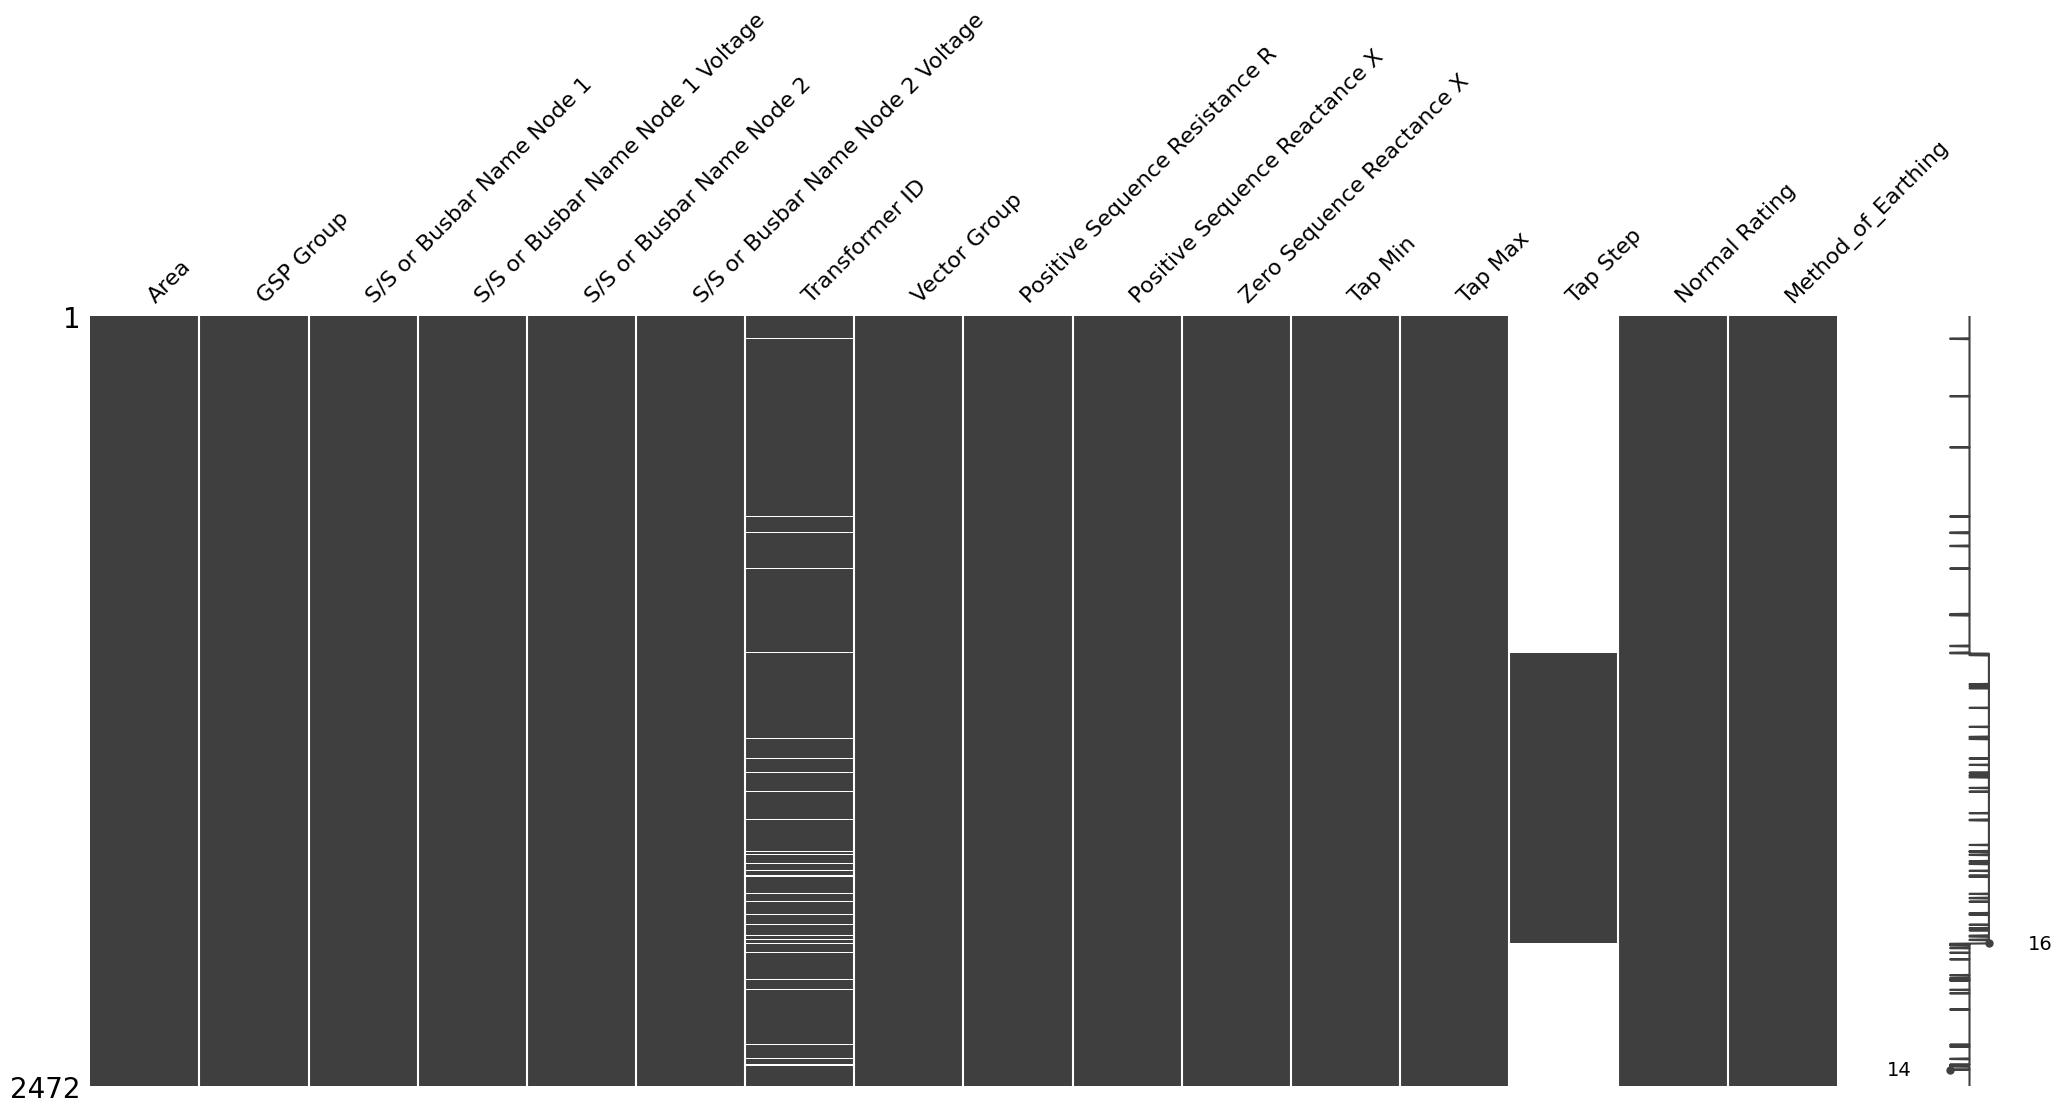

In [200]:
import missingno as mo
mo.matrix(dset2)

In [201]:
print(dset2.columns[dset2.isna().any()])

Index(['Transformer ID', 'Tap Step'], dtype='object')


In [202]:
dset2.count()['Area']

2472

<h1> Filling NULL Values </h1>

In [203]:
print(dset2.isnull().sum())

Area                                    0
GSP Group                               0
S/S or Busbar Name Node 1               0
S/S or Busbar Name Node 1 Voltage       0
S/S or Busbar Name Node 2               0
S/S or Busbar Name Node 2 Voltage       0
Transformer ID                         99
Vector Group                            0
Positive Sequence Resistance R          0
Positive Sequence Reactance X           0
Zero Sequence Reactance X               0
Tap Min                                 0
Tap Max                                 0
Tap Step                             1541
Normal Rating                           0
Method_of_Earthing                      0
dtype: int64


In [204]:
dset_tra_count= dset2["Transformer ID"].value_counts()
print("counting tra here \n",dset_tra_count)

counting tra here 
 373723.0     3
4879861.0    2
373766.0     2
4697002.0    2
373765.0     2
            ..
373783.0     1
12701.0      1
12702.0      1
2291869.0    1
3093094.0    1
Name: Transformer ID, Length: 2313, dtype: int64


In [205]:
dset2["Transformer ID"].unique()

array([ 681123.,  681124.,  681192., ..., 4169152., 3092656., 3093094.])

In [206]:
dset_ts_count= dset2["Tap Step"].value_counts()
print("counting tap step here \n",dset_ts_count)

counting tap step here 
 1.2    407
1.4    281
1.7    178
1.3     46
1.5      6
1.6      6
1.1      4
2.7      2
1.0      1
Name: Tap Step, dtype: int64


In [207]:
dset2["Tap Step"].unique

<bound method Series.unique of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2467   NaN
2468   NaN
2469   NaN
2470   NaN
2471   NaN
Name: Tap Step, Length: 2472, dtype: float64>

In [208]:
tID= dset2["Transformer ID"].mode()[0]
print("tID= ", tID)
dset2["Transformer ID"].fillna(tID, inplace= True)
dset2.head()

tID=  373723.0


,Area,GSP Group,S/S or Busbar Name Node 1,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2,S/S or Busbar Name Node 2 Voltage,Transformer ID,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating,Method_of_Earthing
0,SWALES,Cardiff East & Aberthaw 132 kV,CARS1,132,CARS5,11.0,681123.0,YNd,1.90,69.90,65.200,-20.0,10.0,NaN,20.0,Earth Tx
1,SWALES,Cardiff East & Aberthaw 132 kV,CARS1,132,CARS5,11.0,681124.0,YNd,1.90,69.65,65.200,-20.0,10.0,NaN,20.0,Earth Tx
2,SWALES,Cardiff East & Aberthaw 132 kV,GRAT1,132,GRAT5,11.0,681192.0,YNd,1.92,85.10,72.300,-20.0,10.0,NaN,20.0,Earth Tx
3,SWALES,Cardiff East & Aberthaw 132 kV,GRAT1,132,GRAT5,11.0,681193.0,YNd,1.92,85.10,72.300,-20.0,10.0,NaN,20.0,Earth Tx
4,SWALES,Cardiff East & Aberthaw 132 kV,LLEL11,132,LLEL5A,11.0,680867.0,YNyn,2.65,90.96,545.768,-23.0,5.0,NaN,20.0,LER


In [209]:
tst= dset2["Tap Step"].mode()[0]
print("tst= ", tst)
dset2["Tap Step"].fillna(tst, inplace= True)
dset2.head()

tst=  1.2


,Area,GSP Group,S/S or Busbar Name Node 1,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2,S/S or Busbar Name Node 2 Voltage,Transformer ID,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating,Method_of_Earthing
0,SWALES,Cardiff East & Aberthaw 132 kV,CARS1,132,CARS5,11.0,681123.0,YNd,1.90,69.90,65.200,-20.0,10.0,1.2,20.0,Earth Tx
1,SWALES,Cardiff East & Aberthaw 132 kV,CARS1,132,CARS5,11.0,681124.0,YNd,1.90,69.65,65.200,-20.0,10.0,1.2,20.0,Earth Tx
2,SWALES,Cardiff East & Aberthaw 132 kV,GRAT1,132,GRAT5,11.0,681192.0,YNd,1.92,85.10,72.300,-20.0,10.0,1.2,20.0,Earth Tx
3,SWALES,Cardiff East & Aberthaw 132 kV,GRAT1,132,GRAT5,11.0,681193.0,YNd,1.92,85.10,72.300,-20.0,10.0,1.2,20.0,Earth Tx
4,SWALES,Cardiff East & Aberthaw 132 kV,LLEL11,132,LLEL5A,11.0,680867.0,YNyn,2.65,90.96,545.768,-23.0,5.0,1.2,20.0,LER


In [210]:
dset2.isnull().sum().sum()

0

<h1> EDA (Exploratory Data Analysis
) </h1>

In [211]:
dset2["GSP Group"].value_counts()

Abham_Exeter _Landulph            216
Alverdiscott_Indian Queens        179
Swansea North 132 kV              150
Grendon 132kV                     128
Chesterfield 132kV                114
Willington 132kV                   96
Coventry 132kV                     87
Bishops Wood 132kV                 86
Bridgwater_Taunton                 85
Iron Acton                         75
Cardiff East & Aberthaw 132 kV     74
Enderby 132kV                      73
Ratcliffe 132kV                    67
Port Ham 132kV                     66
Berkswell 132kV                    66
Seabank                            65
East Claydon 132kV                 64
Ironbridge & Shrewsbury 132kV      61
Cellarhead 132kV                   61
Bicker Fen 132kV                   56
Feckenham 66kV                     49
Rassau 132 kV                      46
Staythorpe 132kV                   38
Walpole 132kV                      37
West Burton 132kV                  36
Pembroke 132 kV                    36
Iron Acton 1

In [212]:
import plotly.express as px 
ptran= px.histogram(dset2, x = 'GSP Group',  title="Distribbution of method of Earthing")
ptran.show()  

<h1> From the above graph we can see method of earthing </h1>

In [213]:
dset2["Vector Group"].value_counts()

Dyn11    752
Dy11     430
YNd1     149
dx11     146
Dyn      140
xd1      140
yx0      136
Yyn      126
YNd      122
Yy0       94
Yd11      56
ynyn0     40
Yd1       38
Dzn       23
dz0       17
xx0       15
Yyd0      13
Dy1       12
YNyn       6
Yyy0       6
YY0        3
Dz0        2
Yy11       2
Dy3        1
YNyn0      1
dd0        1
xd11       1
Name: Vector Group, dtype: int64

In [214]:
ptran= px.histogram(dset2, x = 'Vector Group',  title="Group of vectar")
ptran.show()  

<h1> From the above graph we can see the Group of particular vectar</h1>

In [215]:
nof= px.histogram(dset2, x='GSP Group', color="Method_of_Earthing", title="GSP Group / Method of Earthing ")
nof.show()

In [216]:
nof= px.histogram(dset2, x='Vector Group', color="Method_of_Earthing", title="Vector Group / Method of Earthing ")
nof.show()

In [217]:
print("Count of cases:", dset2['Method_of_Earthing'].value_counts())

Count of cases: NER                 1143
LER                  261
SR                   183
Solid                118
TR                   116
Solid/ET+NER         115
R                     80
Shared ASC            72
Earth Tx & LER        63
Earth Tx              59
ET                    48
ET + LER              43
X                     37
Solid/NER             36
Solid/ET              32
TD                    19
D                     14
ASC                   14
T                      5
ET + ASC               4
SX                     2
-                      2
Shared LER             2
Shared ASC / LER       2
TX                     2
Name: Method_of_Earthing, dtype: int64


<h1> Now finding categorical columns </h1>

In [218]:
categorical_values = []
for i in dset2.columns:
    if dset2[i].dtype == "object":
        categorical_values.append(i)
        
print("Categorical columns :", categorical_values)

Categorical columns : ['Area', 'GSP Group', 'S/S or Busbar Name Node 1', 'S/S or Busbar Name Node 2', 'Vector Group', 'Method_of_Earthing']


In [219]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()

In [220]:
for i in categorical_values:
    dset2[i] = le.fit_transform(dset2[i])

In [221]:
dset2.head()

,Area,GSP Group,S/S or Busbar Name Node 1,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2,S/S or Busbar Name Node 2 Voltage,Transformer ID,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating,Method_of_Earthing
0,1,9,379,132,331,11.0,681123.0,7,1.90,69.90,65.200,-20.0,10.0,1.2,20.0,6
1,1,9,379,132,331,11.0,681124.0,7,1.90,69.65,65.200,-20.0,10.0,1.2,20.0,6
2,1,9,816,132,721,11.0,681192.0,7,1.92,85.10,72.300,-20.0,10.0,1.2,20.0,6
3,1,9,816,132,721,11.0,681193.0,7,1.92,85.10,72.300,-20.0,10.0,1.2,20.0,6
4,1,9,1134,132,995,11.0,680867.0,9,2.65,90.96,545.768,-23.0,5.0,1.2,20.0,8


In [222]:
dset2.tail()

,Area,GSP Group,S/S or Busbar Name Node 1,S/S or Busbar Name Node 1 Voltage,S/S or Busbar Name Node 2,S/S or Busbar Name Node 2 Voltage,Transformer ID,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Min,Tap Max,Tap Step,Normal Rating,Method_of_Earthing
2467,3,45,2185,132,1901,11.0,3092205.0,22,2.420,85.130,79.000,-20.0,10.0,1.2,30.0,22
2468,3,45,2186,132,1902,11.0,3092110.0,22,2.594,69.170,69.170,-20.0,10.0,1.2,30.0,22
2469,3,45,2184,132,1900,11.0,4169152.0,22,2.200,90.633,84.067,-20.0,10.0,1.2,30.0,22
2470,3,45,2219,132,1929,33.0,3092656.0,22,0.992,21.467,21.467,-20.0,10.0,1.2,60.0,23
2471,3,45,2220,33,1930,11.0,3093094.0,26,2.881,76.852,0.000,-17.0,6.0,1.2,18.0,24


In [223]:
X= dset2.drop('Method_of_Earthing',axis='columns')
Y= dset2.Method_of_Earthing

In [224]:
import statsmodels.api as sm
X= sm.add_constant(X) 

In [225]:
lr= sm.OLS(Y,X).fit()
print(lr.summary2())

                          Results: Ordinary least squares
Model:                    OLS                    Adj. R-squared:         0.452     
Dependent Variable:       Method_of_Earthing     AIC:                    13085.3808
Date:                     2023-05-06 16:56       BIC:                    13178.3854
No. Observations:         2472                   Log-Likelihood:         -6526.7   
Df Model:                 15                     F-statistic:            136.8     
Df Residuals:             2456                   Prob (F-statistic):     5.31e-310 
R-squared:                0.455                  Scale:                  11.578    
-----------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t     P>|t|   [0.025   0.975]
-----------------------------------------------------------------------------------
const                             -9.6668   1.2619  -7.6603 0.0000 -12.1413 -7.1922
Area              

In [226]:
p_values= lr.pvalues
cols= p_values[p_values<=0.05].index.tolist() 
print(cols)

['const', 'Area', 'S/S or Busbar Name Node 2 Voltage', 'Vector Group', 'Positive Sequence Resistance R', 'Positive Sequence Reactance X', 'Zero Sequence Reactance X', 'Tap Max', 'Tap Step', 'Normal Rating']


In [227]:
X= X[cols[1:]]
X.head()

,Area,S/S or Busbar Name Node 2 Voltage,Vector Group,Positive Sequence Resistance R,Positive Sequence Reactance X,Zero Sequence Reactance X,Tap Max,Tap Step,Normal Rating
0,1,11.0,7,1.90,69.90,65.200,10.0,1.2,20.0
1,1,11.0,7,1.90,69.65,65.200,10.0,1.2,20.0
2,1,11.0,7,1.92,85.10,72.300,10.0,1.2,20.0
3,1,11.0,7,1.92,85.10,72.300,10.0,1.2,20.0
4,1,11.0,9,2.65,90.96,545.768,5.0,1.2,20.0


In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 42)

<h1> Here Iam checking for the distribution of target variable in train test split </h1>

In [229]:
print('Distribution of target variable in training dataset')
print(Y_train.value_counts())

print('Distribution of target variable in test dataset')
print(Y_test.value_counts())

Distribution of target variable in training dataset
9     914
8     209
11    146
16     94
22     93
18     92
10     64
13     57
7      50
6      47
3      38
5      34
24     30
19     29
17     26
21     15
2      11
1      11
20      4
4       3
15      2
0       2
12      2
14      2
23      2
Name: Method_of_Earthing, dtype: int64
Distribution of target variable in test dataset
9     229
8      52
11     37
16     24
22     23
18     23
10     16
13     15
7      13
6      12
3      10
5       9
24      7
19      7
17      6
21      4
2       3
1       3
4       1
20      1
Name: Method_of_Earthing, dtype: int64


<h1> Data Normalization </h1>

In [230]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<h1> Decision Tree </h1>

SkLearn_DT

In [231]:
from sklearn.tree import DecisionTreeClassifier

# create an instance of the DecisionTreeClassifier class
skd= DecisionTreeClassifier(max_depth = 4,random_state = 42)
skd.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [232]:
y_pred= skd.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score,f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, y_pred)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))

Model Accuracy: 0.701010101010101%
f1_score  0.6805300135667045


<h1> Here Iam Creating an instance of XGBoost Classifier </h1>

In [233]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(max_depth= 4,random_state= 42)
xgb_clf.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [234]:
predY= xgb_clf.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score,f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, predY)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))

Model Accuracy: 0.8444444444444444%
f1_score  0.8348627708488746


<h1> Random Forest </h1>

XGBoost_RF

In [235]:
from xgboost import XGBRFClassifier
rfxb= XGBRFClassifier(n_estimators=100, max_depth=4)
rfxb.fit(X_train,Y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=4, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                objective='multi:softprob', predictor=None, random_state=None,
                reg_alpha=None, ...)

In [236]:
predY= rfxb.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score,f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, predY)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))

Model Accuracy: 0.7838383838383839%
f1_score  0.7461966092833191


SKLearn_RF

In [237]:
from sklearn.ensemble import RandomForestClassifier

# create an instance of the DecisionTreeClassifier class
clf_RF= RandomForestClassifier(n_estimators=100, max_depth=4)
clf_RF.fit(X_train,Y_train)

RandomForestClassifier(max_depth=4)

In [238]:
predY= clf_RF.predict(X_test)
"""### *Accuracy Score*"""

from sklearn.metrics import accuracy_score, f1_score
print("Model Accuracy: {0}%".format(accuracy_score(Y_test, predY)))
print("f1_score ",f1_score(Y_test, predY,average='weighted'))

Model Accuracy: 0.7616161616161616%
f1_score  0.6929243973062479
